<a href="https://colab.research.google.com/github/MattLanzUnimib/DataScienceLab/blob/main/DsLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import datetime as dt

In [ ]:
columns = ['data','totaleintero','totaledecimale','settore']

In [ ]:
df = pd.read_csv("serie-storiche-ecommerce.csv", index_col=False, quotechar="'")

0        2013-02-01
1        2013-02-21
2        2013-04-01
3        2013-04-06
4        2013-07-09
            ...    
25256    2022-04-06
25257    2022-04-07
25258    2022-04-07
25259    2022-04-07
25260    2022-04-08
Name: data, Length: 25261, dtype: object

In [ ]:
df['totale'] = df['totale'].str.replace(',', '.')
df['totale'] = pd.to_numeric(df['totale'])

In [ ]:
df['data'] = pd.to_datetime(df['data'])
df['year'] = df['data'].dt.year

In [ ]:
dist_settore = df.groupby(['settore','year'], as_index=False)['totale'].agg(['count','mean','std','min','max'])


In [ ]:
dist_settore.reset_index(inplace=True)

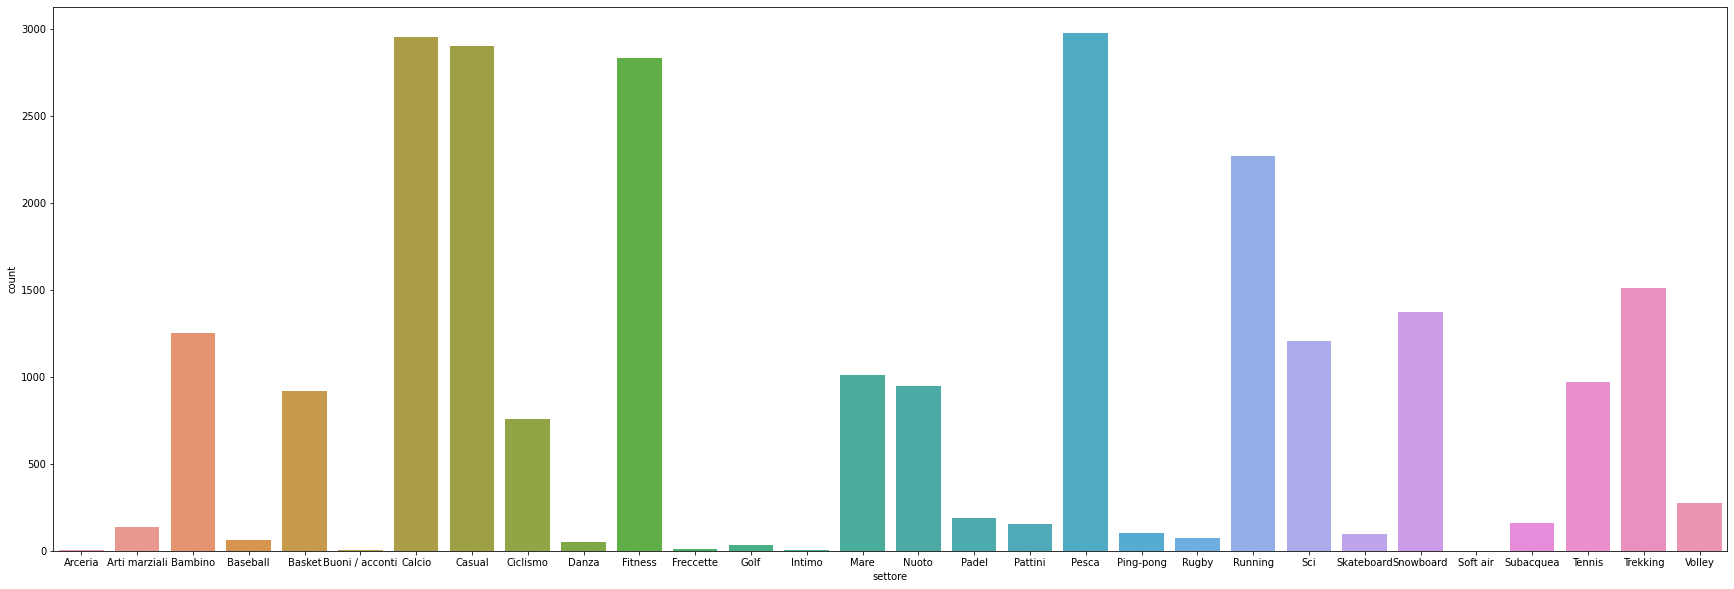

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax = sns.barplot(data=dist_settore, x='settore', y='count')


30

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


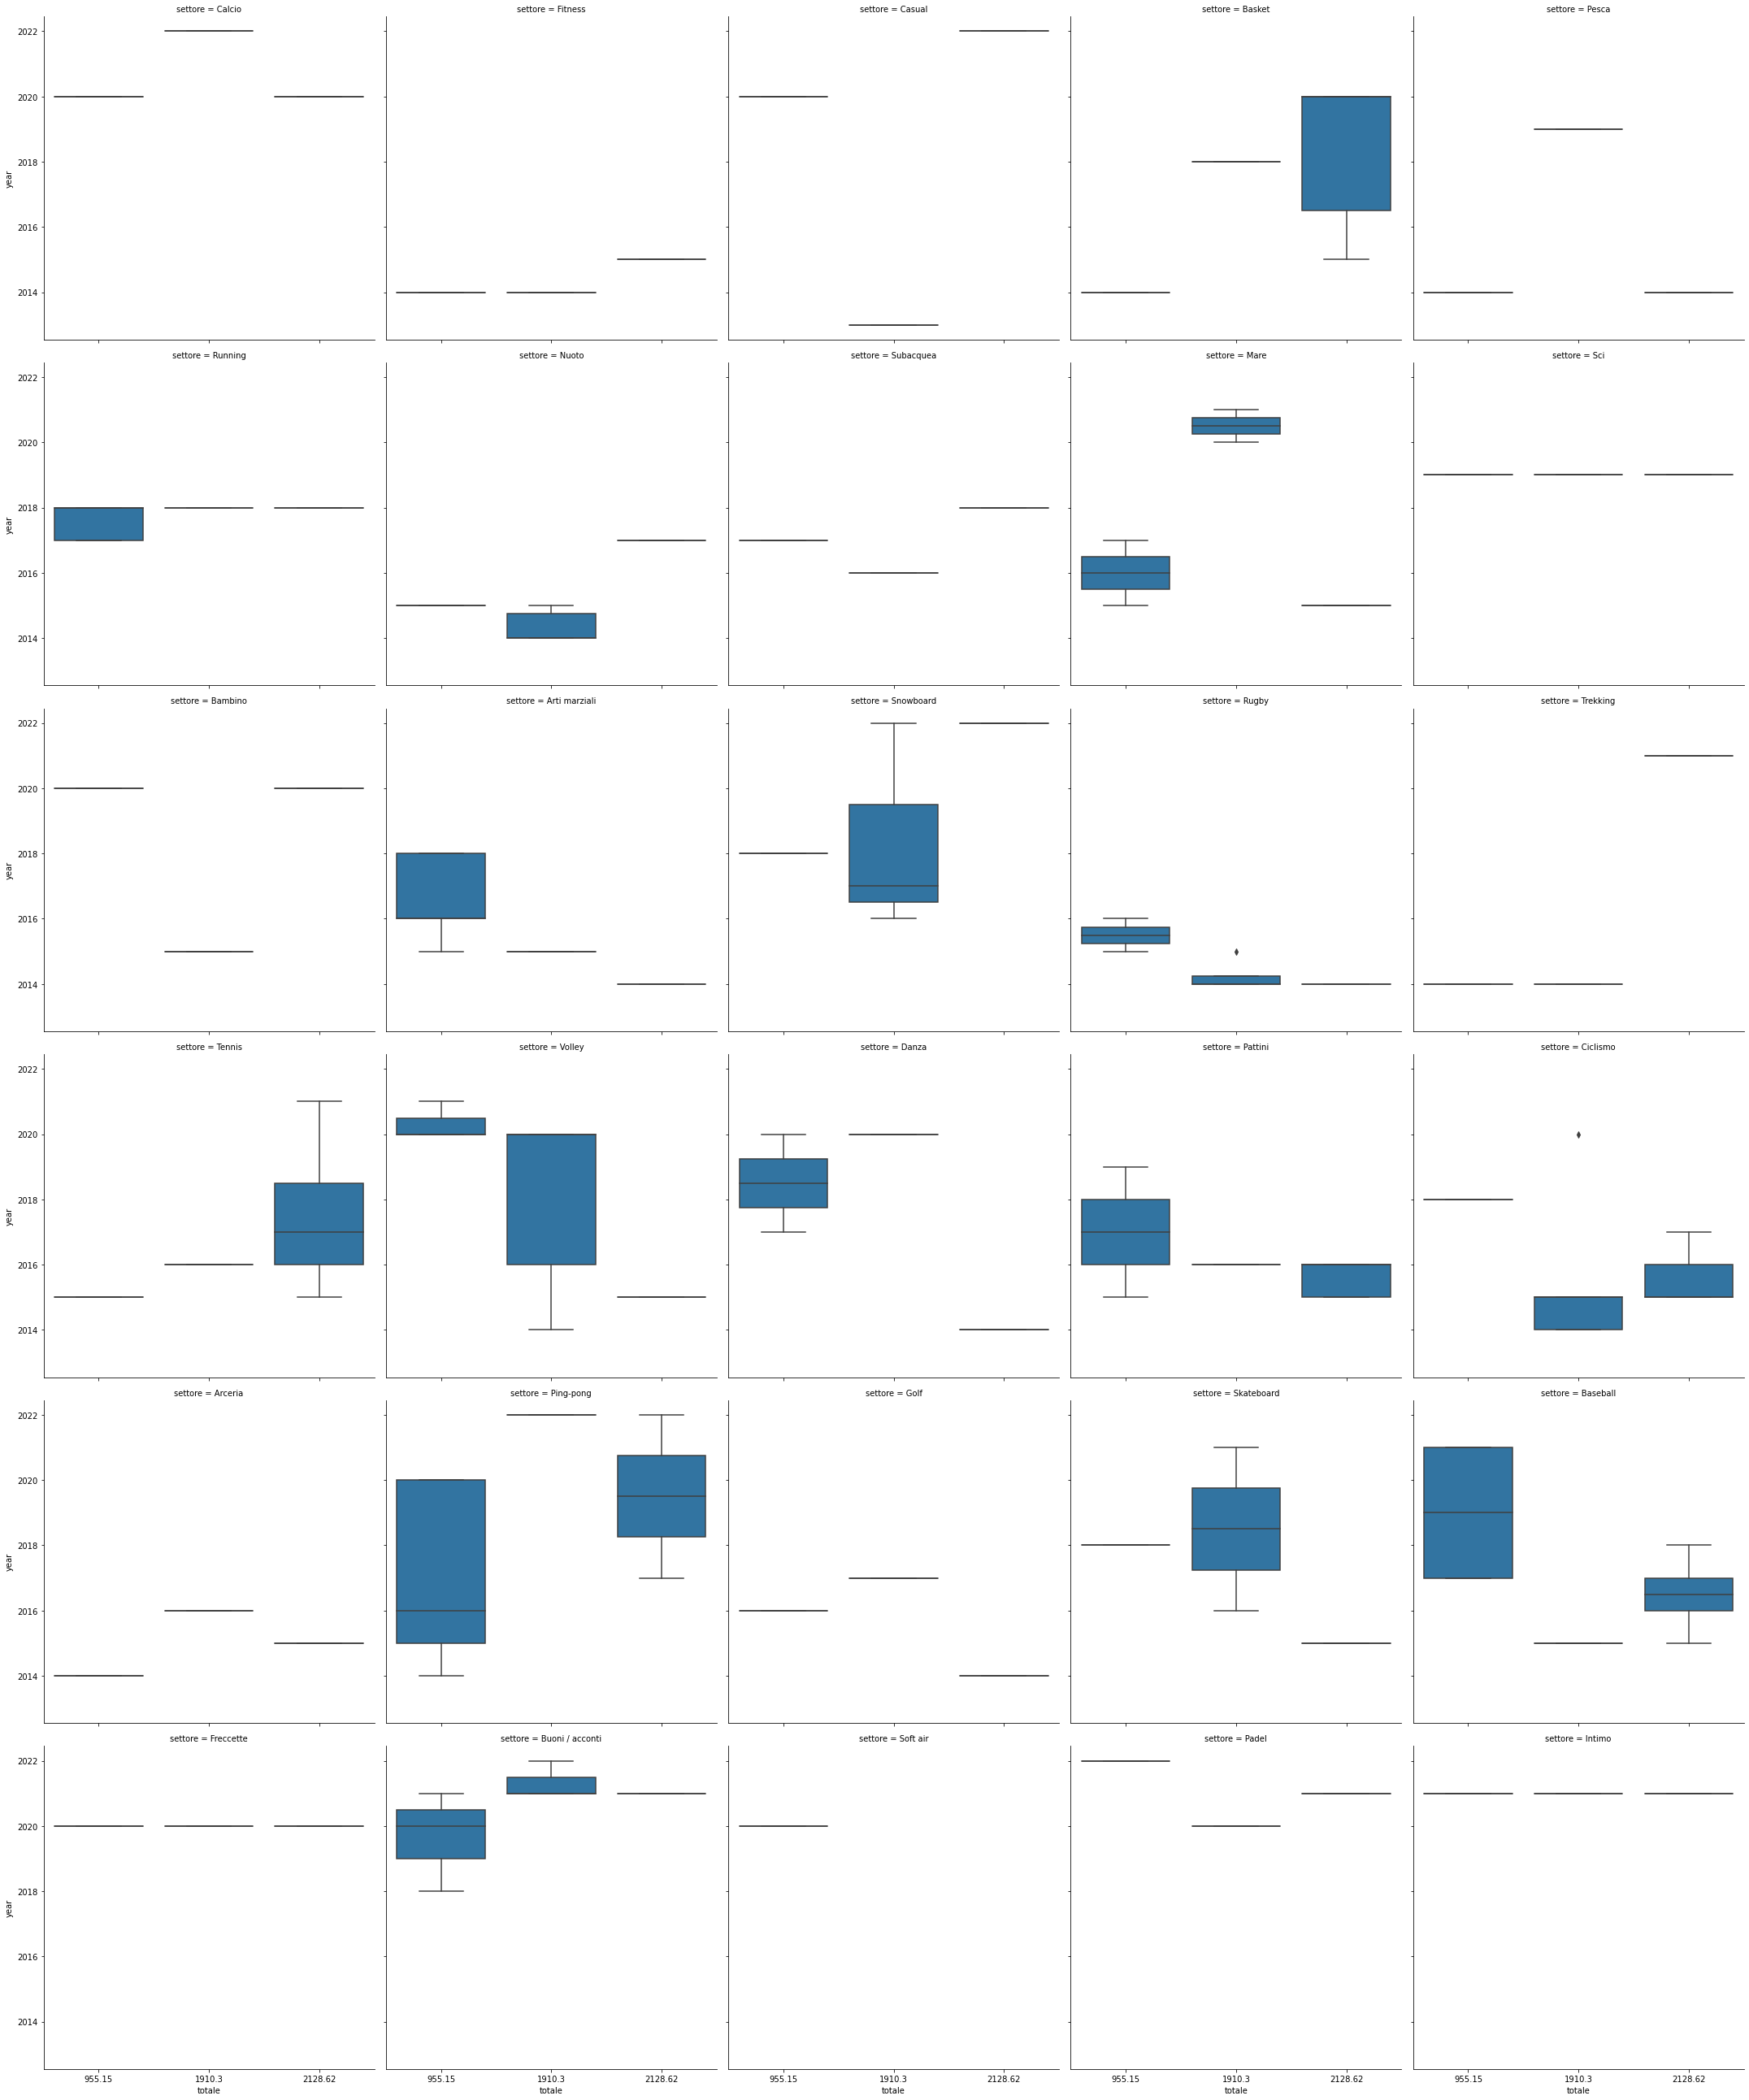

In [ ]:
g = sns.FacetGrid(df, col="settore", col_wrap=5, height=6, order=)
g.map(sns.boxplot, "totale", "year")

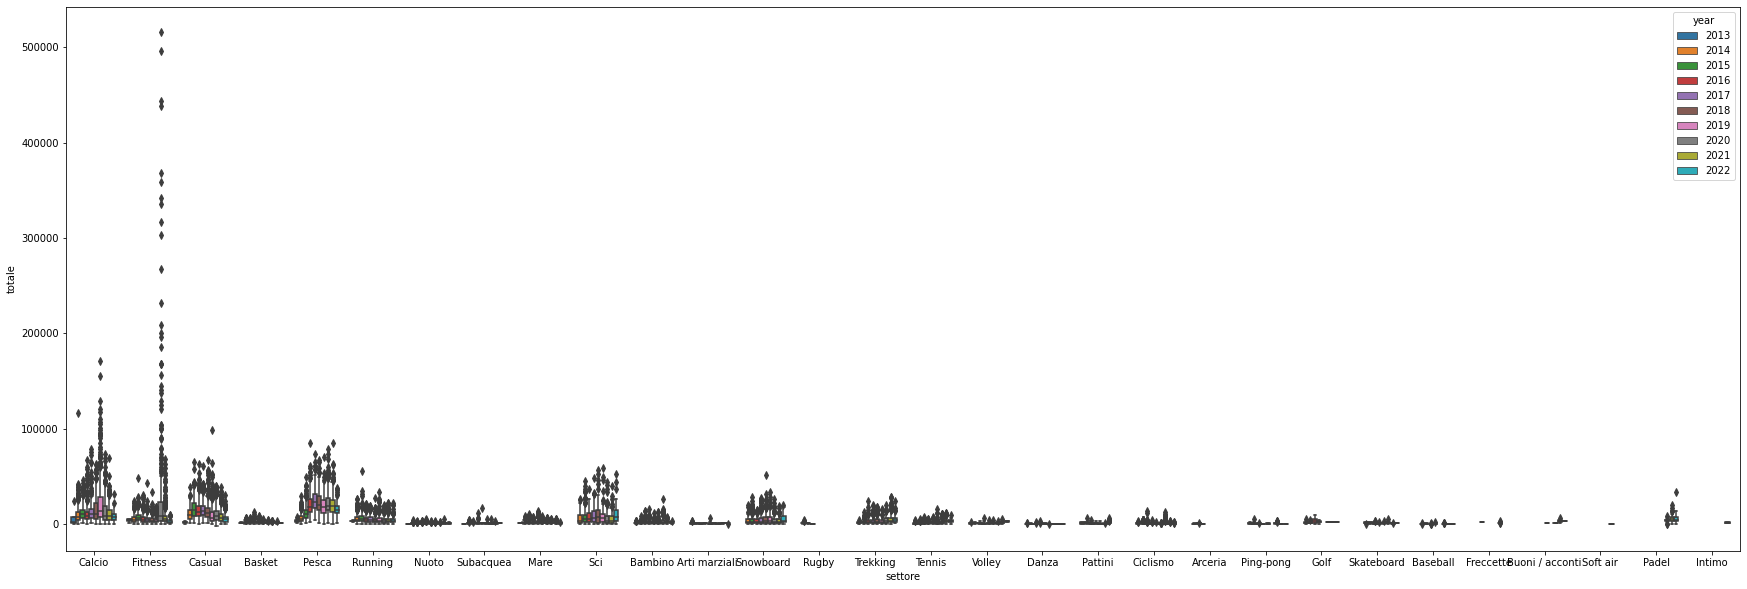

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
ax = sns.boxplot(data=df, x='settore', y='totale', hue='year')